In [10]:
%load_ext nb_black
import sys
import warnings
sys.path.append("../")


import numpy as np
import matplotlib.pyplot as plt
import copy
import cartopy.crs as ccrs

# import MESMER tools
from mesmer.calibrate_mesmer import train_gt, train_lt
from mesmer.create_emulations import create_emus_gt,create_emus_lt
from mesmer.io import load_cmipng, load_regs_ls_wgt_lon_lat, load_mesmer_output
from mesmer.utils import convert_dict_to_arr, extract_land, separate_hist_future




# load in configurations used in this script
import configs.config_across_scen_T_cmip6ng_sspall_default as cfg
import configs.config_across_scen_T_cmip6ng_sspall_additional_predictors as cfg_adp



The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Load in all the necessary data

In [2]:
print('Load in the CMIP6 ESM runs')
# specify the target variable
targ = cfg.targs[0]
print(targ)

# load in the ESM runs
esms = cfg.esms

# load in tas with global coverage
tas_g_dict = {}  # tas with global coverage
GSAT_dict = {}  # global mean tas
tas_g = {}
GSAT = {}
GHFDS_dict = {}
GHFDS = {}
time = {}
tas_s={} # tas separated hist and future scenarios

for esm in esms:
    print('start with', esm)
    tas_g_dict[esm] = {}
    GSAT_dict[esm] = {}
    GHFDS_dict[esm] = {}
    time[esm] = {}

    for scen in cfg.scenarios:

        tas_g_tmp, GSAT_tmp, lon_tmp, lat_tmp, time_tmp = load_cmipng(
            targ, esm, scen, cfg
        )

        if tas_g_tmp is None:
            warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
        else:  # if scen exists: save fields
            tas_g_dict[esm][scen], GSAT_dict[esm][scen], lon, lat, time[esm][scen] = (
                tas_g_tmp,
                GSAT_tmp,
                lon_tmp,
                lat_tmp,
                time_tmp,
            )
            _, GHFDS_dict[esm][scen], _, _, _ = load_cmipng("hfds", esm, scen, cfg)

    tas_g[esm] = convert_dict_to_arr(tas_g_dict[esm])
    GSAT[esm] = convert_dict_to_arr(GSAT_dict[esm])
    GHFDS[esm] = convert_dict_to_arr(GHFDS_dict[esm])

# load in the constant files
reg_dict, ls, wgt_g, lon, lat = load_regs_ls_wgt_lon_lat(cfg.reg_type, lon, lat)

# extract land
tas, reg_dict, ls = extract_land(
    tas_g, reg_dict, wgt_g, ls, threshold_land=cfg.threshold_land
)

# separate hist / future in esm runs
for esm in esms:
    tas_s[esm], time_s = separate_hist_future(tas[esm], time[esm], cfg)


Load in the CMIP6 ESM runs
tas
start with ACCESS-CM2


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with ACCESS-ESM1-5


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with AWI-CM-1-1-MR


/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM AWI-CM-1-1-MR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM AWI-CM-1-1-MR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp434 does not exist for tas for ESM AWI-CM-1-1-MR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM AWI-CM-1-1-MR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


start with CanESM5


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with CESM2


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with CESM2-WACCM


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM CESM2-WACCM
  warnings.warn(f"Scenario {scen} does not exist fo

start with CMCC-CM2-SR5


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM CMCC-CM2-SR5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM CMCC-CM2-SR5
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {e

start with CNRM-CM6-1


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with CNRM-CM6-1-HR


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM CNRM-CM6-1-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM CNRM-CM6-1-HR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM 

start with CNRM-ESM2-1


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


start with E3SM-1-1


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM E3SM-1-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM E3SM-1-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp245 does not exist for tas for ESM E3SM-1-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM E3SM-1-1
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Sc

start with FGOALS-f3-L


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with FGOALS-g3


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with FIO-ESM-2-0


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM FIO-ESM-2-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM FIO-ESM-2-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/

start with HadGEM3-GC31-LL


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM HadGEM3-GC31-LL
  warnings.warn(f"Scenario {scen} does not exis

start with HadGEM3-GC31-MM


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM HadGEM3-GC31-MM
  warnings.warn(f"Scenario {scen} does not exis

start with IPSL-CM6A-LR


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with MCM-UA-1-0


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM MCM-UA-1-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp534-over does not exist for tas for ESM MCM-UA-1-0
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}"

start with MPI-ESM1-2-HR


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with MPI-ESM1-2-LR


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp119 does not exist for tas for ESM MPI-ESM1-2-LR
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")


start with MRI-ESM2-0


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

start with NESM3


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp370 does not exist for tas for ESM NESM3
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM NESM3
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/land

start with NorESM2-LM


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM NorESM2-LM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np

start with NorESM2-MM


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_52034/3930468419.py:33: UserWarning: Scenario h-ssp460 does not exist for tas for ESM NorESM2-MM
  warnings.warn(f"Scenario {scen} does not exist for tas for ESM {esm}")
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np

start with UKESM1-0-LL


/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/cfc/landclim1/beuschl/conda/envs/mesmer-openscmrunner-test/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered

<IPython.core.display.Javascript object>

In [3]:
print(
    "Load in the MESMER emulations of the default configuration and of the additional predictors one"
)
emus_lt = {}  # default local trends, i.e., forced warming
emus_lv = {}  # default local variability
emus_lv_s = {}  # emus_lv with hist future separated

emus_lt_adp = {}  # emus_lt additional predictors
emus_lv_adp = {}  # emus_lv additional predictors
emus_lv_adp_s = {}  # emus_lv additional predictors _s

for esm in esms:
    print("start with", esm)
    # load in the forced local warming of the default config
    tmp = load_mesmer_output("emus_lt", cfg, esm_str=esm, scen_str="hist")
    emus_lt[esm] = {}
    # get rid of tas key
    for scen in tmp.keys():
        emus_lt[esm][scen] = tmp[scen]["tas"]
    # load in the local variability of the default config
    tmp = load_mesmer_output("emus_lv", cfg, esm_str=esm)
    emus_lv[esm] = tmp["all"]["tas"]

    # load in the forced local warming of the additional preds config
    tmp = load_mesmer_output("emus_lt", cfg_adp, esm_str=esm, scen_str="hist")
    emus_lt_adp[esm] = {}
    for scen in tmp.keys():
        emus_lt_adp[esm][scen] = tmp[scen]["tas"]

    # load in the local variability of the additional preds config
    tmp = load_mesmer_output("emus_lv", cfg_adp, esm_str=esm, scen_str="all")
    emus_lv_adp[esm] = {}
    emus_lv_adp[esm] = tmp["all"]["tas"]

    # separate hist / future in lv emulations
    time_full = time[esm]["h-ssp585"]
    idx_fut_start = np.where(time_full == time_s["hist"][-1])[0][0] + 1
    emus_lv_s[esm] = {}
    emus_lv_s[esm]["hist"] = emus_lv[esm][:, :idx_fut_start]
    emus_lv_s[esm]["fut"] = emus_lv[esm][:, idx_fut_start:]
    emus_lv_adp_s[esm] = {}
    emus_lv_adp_s[esm]["hist"] = emus_lv_adp[esm][:, :idx_fut_start]
    emus_lv_adp_s[esm]["fut"] = emus_lv_adp[esm][:, idx_fut_start:]

Load in the MESMER emulations of the default configuration and of the additional predictors one
start with ACCESS-CM2
start with ACCESS-ESM1-5
start with AWI-CM-1-1-MR
start with CanESM5
start with CESM2
start with CESM2-WACCM
start with CMCC-CM2-SR5
start with CNRM-CM6-1
start with CNRM-CM6-1-HR
start with CNRM-ESM2-1
start with E3SM-1-1
start with FGOALS-f3-L
start with FGOALS-g3
start with FIO-ESM-2-0
start with HadGEM3-GC31-LL
start with HadGEM3-GC31-MM
start with IPSL-CM6A-LR
start with MCM-UA-1-0
start with MPI-ESM1-2-HR
start with MPI-ESM1-2-LR
start with MRI-ESM2-0
start with NESM3
start with NorESM2-LM
start with NorESM2-MM
start with UKESM1-0-LL


<IPython.core.display.Javascript object>

In [4]:
print('Prepare scenario list for plotting')
# hist gets its own scenario
scenarios=list(map(lambda x: x.replace("h-", ""), cfg.scenarios))
scenarios+=['hist']
print(scenarios)

scen_names = {}
scen_names['ssp585']='SSP5-8.5'
scen_names['ssp370']='SSP3-7.0'
scen_names['ssp460']='SSP4-6.0'
scen_names['ssp245']='SSP2-4.5'
scen_names['ssp534-over']='SSP5-3.4-over'
scen_names['ssp434']='SSP4-3.4'
scen_names['ssp126']='SSP1-2.6'
scen_names['ssp119']='SSP1-1.9'
scen_names['hist']='Historical'


Prepare scenario list for plotting
['ssp585', 'ssp370', 'ssp460', 'ssp245', 'ssp534-over', 'ssp434', 'ssp126', 'ssp119', 'hist']


<IPython.core.display.Javascript object>

# Main paper

## Figure 3

In [5]:
print('Compute forced warming (error) statistics and fill into array for plotting')

# how many years back from end of scenario at hand the evaluation reaches
idx_start = 30 


nr_lats = len(lat['c'])
nr_cols = (4+1)*len(esms)


m_lt_arr={}
mabe_lt_p_arr={}
for scen in scenarios:
    m_lt_arr[scen] = np.ma.zeros([nr_lats,nr_cols])
    m_lt_arr[scen].mask = True # mask the full array
    mabe_lt_p_arr[scen] = np.ma.zeros([nr_lats,nr_cols])
    mabe_lt_p_arr[scen].mask = True # mask the full array

    for i,esm in enumerate(esms):
        if scen in tas_s[esm].keys():
            # Tglob as pred
            m_lt = np.mean(emus_lt[esm][scen][-idx_start:,:],axis=0)
                # mean local trends, i.e., mean local forced warming
            m_lt_g=copy.deepcopy(ls['grid_l_m'])
            m_lt_g[ls['idx_grid_l']]=m_lt
            m_lt_arr[scen][:,i*5]=np.mean(m_lt_g,axis=1)
            
            # Tglob, Tglob^2, glob hfds as preds
            m_lt_adp = np.mean(emus_lt_adp[esm][scen][-idx_start:,:],axis=0)
            m_lt_adp_g = copy.deepcopy(ls['grid_l_m'])
            m_lt_adp_g[ls['idx_grid_l']]=m_lt_adp
            m_lt_arr[scen][:,i*5+3]=np.mean(m_lt_adp_g,axis=1)
            
            # Tglob as pred
            mabe_lt_p = np.abs(np.mean((tas_s[esm][scen]-emus_lt[esm][scen])[:,-idx_start:,:],axis=(0,1)))/m_lt*100
                #mean absolute error lt in percentage of mean lt
            mabe_lt_p_g=copy.deepcopy(ls['grid_l_m'])
            mabe_lt_p_g[ls['idx_grid_l']]=mabe_lt_p
            mabe_lt_p_arr[scen][:,i*5+1]=np.mean(mabe_lt_p_g,axis=1)

            # Tglob, Tglob^2, glob hfds as preds
            mabe_lt_adp_p = np.abs(np.mean((tas_s[esm][scen]-emus_lt_adp[esm][scen])[:,-idx_start:,:],axis=(0,1)))/m_lt_adp*100
            mabe_lt_adp_p_g=copy.deepcopy(ls['grid_l_m'])
            mabe_lt_adp_p_g[ls['idx_grid_l']]=mabe_lt_adp_p
            mabe_lt_p_arr[scen][:,i*5+2]=np.mean(mabe_lt_adp_p_g,axis=1)
        


Compute forced warming (error) statistics and fill into array for plotting


<IPython.core.display.Javascript object>

Plot forced warming (error) statistics, i.e., Figure 3


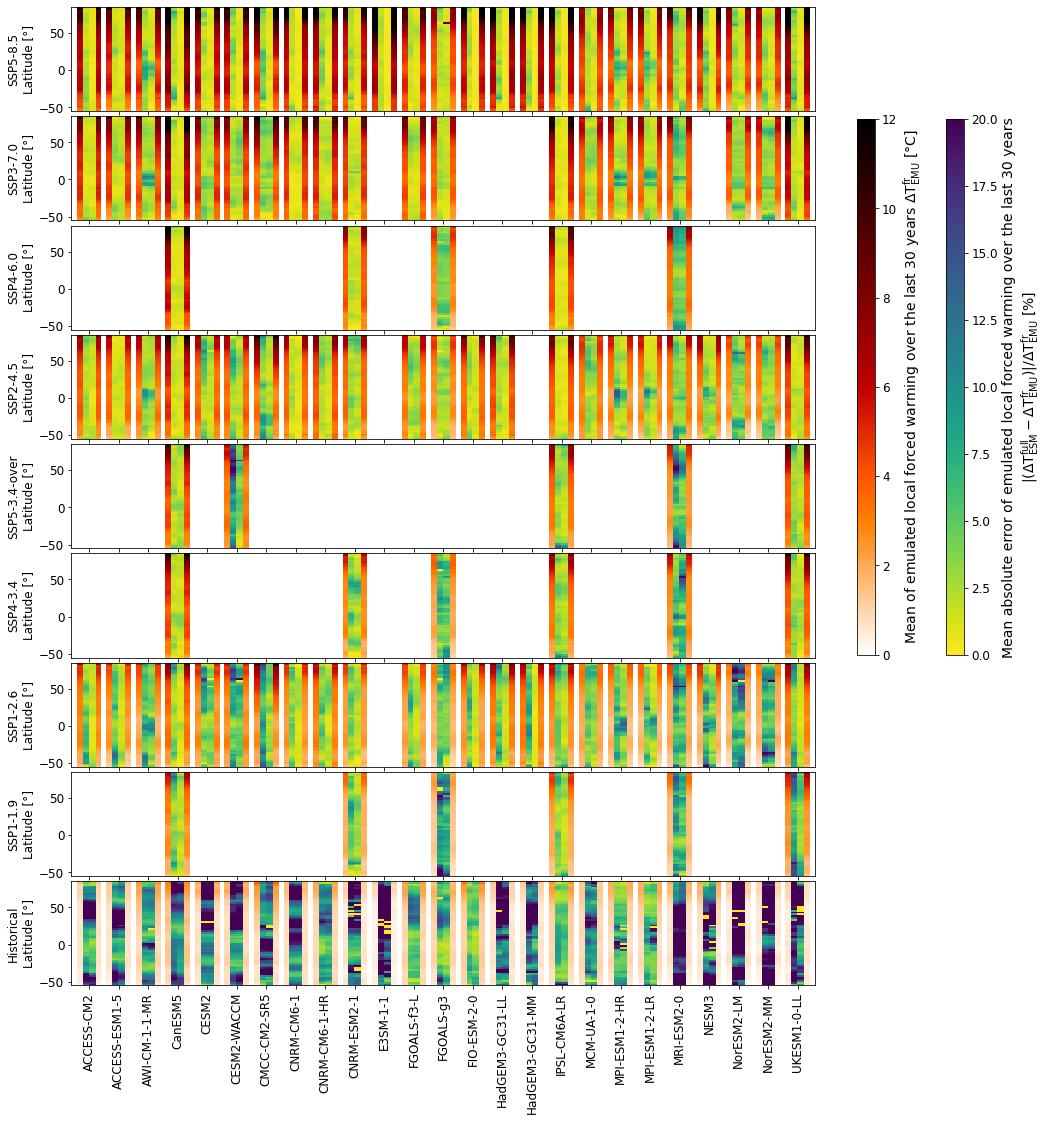

<IPython.core.display.Javascript object>

In [6]:
print("Plot forced warming (error) statistics, i.e., Figure 3")
plt.figure(figsize=(16, 2 * len(scenarios)))
plt.rcParams.update({"mathtext.default": "regular"})
fs = 12
plt.rcParams.update({"font.size": fs})

grid = plt.GridSpec(
    len(scenarios), len(esms) + 5, wspace=0.0, hspace=0.05
)  # create a grid for the subplots


for i, scen in enumerate(scenarios):
    ax1 = plt.subplot(grid[i, : len(esms)])

    mesh_m_lt = plt.pcolormesh(
        np.arange(126), lat["e"], m_lt_arr[scen], cmap="gist_heat_r", vmin=0, vmax=12
    )
    mesh_mabe_lt = plt.pcolormesh(
        np.arange(126), lat["e"], mabe_lt_p_arr[scen], cmap="viridis_r", vmin=0, vmax=20
    )
    plt.ylim([lat["e"][14], lat["e"][70]])
    plt.xticks(np.arange(2, 126, 5))
    plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
    plt.xlim([-1, 125])
    plt.ylabel(scen_names[scen] + "\nLatitude [°]")

plt.xticks(np.arange(2, 126, 5), esms, rotation=90)

ax1 = plt.subplot(grid[:-2, -5:-3])
plt.axis("off")
cbar = plt.colorbar(mesh_m_lt, fraction=0.3, aspect=30)
cbar.set_label(
    "Mean of emulated local forced warming over the last "
    + str(idx_start)
    + " years $\Delta T^{fr}_{EMU}$ [°C]",
    fontsize=fs + 2,
)

ax1 = plt.subplot(grid[:-2, -2:])
plt.axis("off")
cbar = plt.colorbar(mesh_mabe_lt, fraction=0.3, aspect=30)
cbar.set_label(
    "Mean absolute error of emulated local forced warming over the last "
    + str(idx_start)
    + " years\n$|(\Delta T^{full}_{ESM} - \Delta T^{fr}_{EMU})| / \Delta T^{fr}_{EMU}$ [%]",
    fontsize=fs + 2,
)


# plt.savefig(cfg.dir_plots+'lt_mesmer_eval_default_vs_addpreds_allesms_allscens.png' ,dpi=200 ,bbox_inches='tight')
# plt.savefig(cfg.dir_plots+'lt_mesmer_eval_default_vs_addpreds_allesms_allscens.pdf' ,dpi=200 ,bbox_inches='tight')

## Figure 4

In [7]:
print('Compute local variability (error) statistics and fill into array for plotting')

# evaluation period = full scenario length 
# -> 200 just as a filler for something longer than any of the scenarios 
# to ensure that full scenario considered for each scenario
idx_start = 200


nr_lats = len(lat['c'])
nr_cols = (4+1)*len(esms)


std_lv_arr={}
mabe_lv_p_arr={}
for scen in scenarios:
    std_lv_arr[scen] = np.ma.zeros([nr_lats,nr_cols])
    std_lv_arr[scen].mask = True # mask the full array
    mabe_lv_p_arr[scen] = np.ma.zeros([nr_lats,nr_cols])
    mabe_lv_p_arr[scen].mask = True # mask the full array

    for i,esm in enumerate(esms):
        if scen in tas_s[esm].keys():
            if scen != 'hist':
                scen_lv = 'fut'
            else:
                scen_lv = 'hist'
            # Tglob as pred for emus_lt
            std_lv = np.std(emus_lv_s[esm][scen_lv][:,-idx_start:,:],axis=(0,1))
                # standard deviation of local variability (derived based on all local variability emulations)
            std_lv_g=copy.deepcopy(ls['grid_l_m'])
            std_lv_g[ls['idx_grid_l']]=std_lv
            std_lv_arr[scen][:,i*5]=np.mean(std_lv_g,axis=1)
            
            # Tglob, Tglob^2, glob hfds as preds for emus_lt
            std_lv_adp = np.std(emus_lv_adp_s[esm][scen_lv][:,-idx_start:,:],axis=(0,1))
            std_lv_adp_g = copy.deepcopy(ls['grid_l_m'])
            std_lv_adp_g[ls['idx_grid_l']]=std_lv_adp
            std_lv_arr[scen][:,i*5+3]=np.mean(std_lv_adp_g,axis=1)
            
            # Tglob as pred for emus_lt
            mabe_lv_p = np.abs(np.std((tas_s[esm][scen]-emus_lt[esm][scen])[:,-idx_start:,:],axis=(0,1))-std_lv)/std_lv*100
                # mean absolute error std_lv in percentage of std_lv
            mabe_lv_p_g=copy.deepcopy(ls['grid_l_m'])
            mabe_lv_p_g[ls['idx_grid_l']]=mabe_lv_p
            mabe_lv_p_arr[scen][:,i*5+1]=np.mean(mabe_lv_p_g,axis=1)

            # Tglob, Tglob^2, glob hfds as preds for emus_lt
            mabe_lv_adp_p = np.abs(np.std((tas_s[esm][scen]-emus_lt_adp[esm][scen])[:,-idx_start:,:],axis=(0,1))-std_lv_adp)/std_lv_adp*100
            mabe_lv_adp_p_g=copy.deepcopy(ls['grid_l_m'])
            mabe_lv_adp_p_g[ls['idx_grid_l']]=mabe_lv_adp_p
            mabe_lv_p_arr[scen][:,i*5+2]=np.mean(mabe_lv_adp_p_g,axis=1)
        


Compute local variability (error) statistics and fill into array for plotting


<IPython.core.display.Javascript object>

Plot local variability (error) statistics, i.e., Figure 4


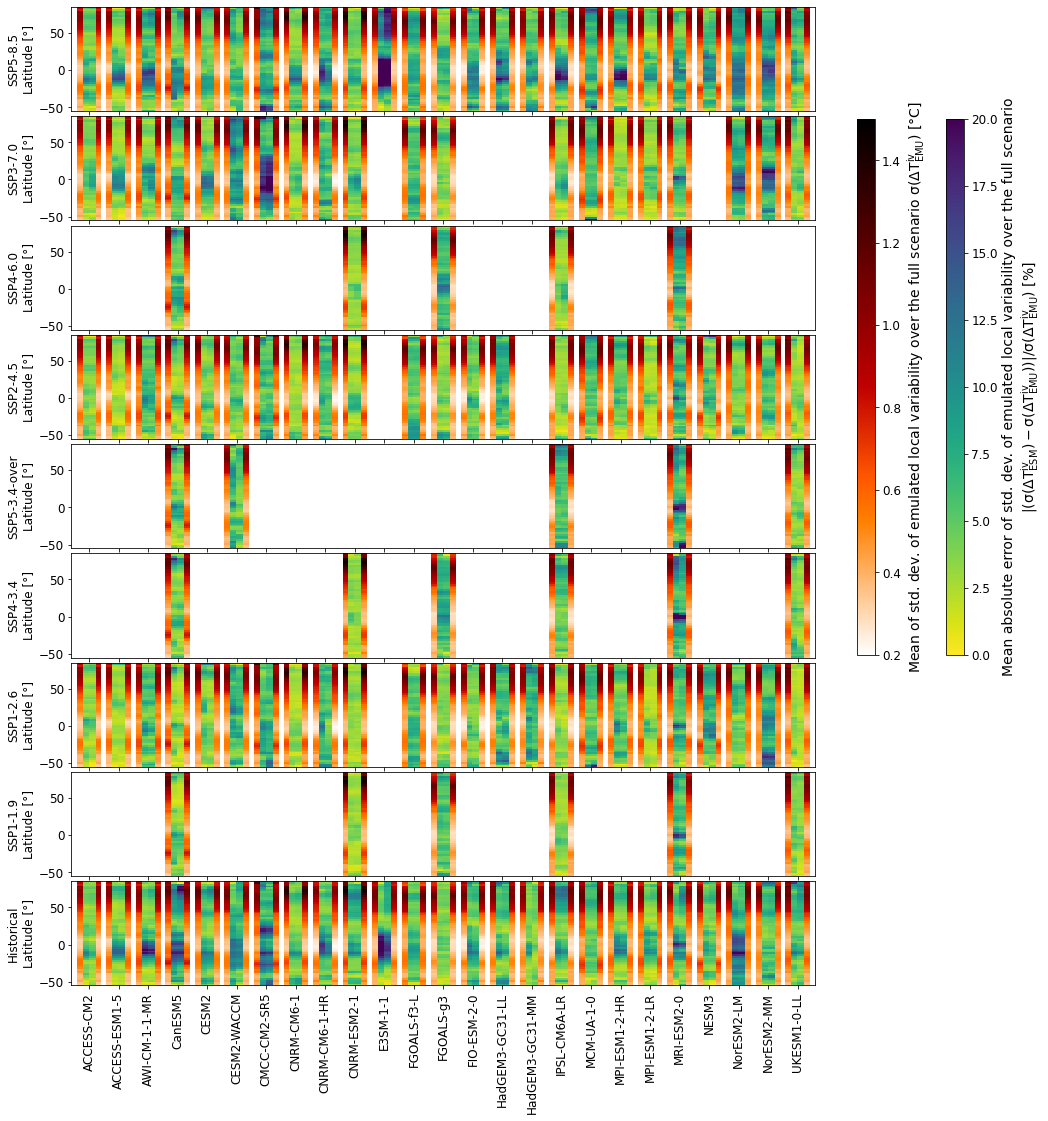

<IPython.core.display.Javascript object>

In [8]:
print("Plot local variability (error) statistics, i.e., Figure 4")


plt.figure(figsize=(16, 2 * len(scenarios)))
plt.rcParams.update({"mathtext.default": "regular"})
fs = 12
plt.rcParams.update({"font.size": fs})

grid = plt.GridSpec(
    len(scenarios), len(esms) + 5, wspace=0.0, hspace=0.05
)  # create a grid for the subplots


for i, scen in enumerate(scenarios):
    ax1 = plt.subplot(grid[i, : len(esms)])

    mesh_m_lt = plt.pcolormesh(
        np.arange(126),
        lat["e"],
        std_lv_arr[scen],
        cmap="gist_heat_r",
        vmin=0.2,
        vmax=1.5,
    )
    mesh_mabe_lt = plt.pcolormesh(
        np.arange(126), lat["e"], mabe_lv_p_arr[scen], cmap="viridis_r", vmin=0, vmax=20
    )
    plt.ylim([lat["e"][14], lat["e"][70]])
    plt.xticks(np.arange(2, 126, 5))
    plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
    plt.xlim([-1, 125])

    plt.ylabel(scen_names[scen] + "\nLatitude [°]")

plt.xticks(np.arange(2, 126, 5), esms, rotation=90)

ax1 = plt.subplot(grid[:-2, -5:-3])
plt.axis("off")
cbar = plt.colorbar(mesh_m_lt, fraction=0.3, aspect=30)
cbar.set_label(
    "Mean of std. dev. of emulated local variability over the full scenario $\sigma(\Delta T^{iv}_{EMU})$ [°C]",
    fontsize=fs + 2,
)

ax1 = plt.subplot(grid[:-2, -2:])
plt.axis("off")
cbar = plt.colorbar(mesh_mabe_lt, fraction=0.3, aspect=30)
cbar.set_label(
    "Mean absolute error of std. dev. of emulated local variability over the full scenario\n$|(\sigma(\Delta T^{iv}_{ESM}) - \sigma(\Delta T^{iv}_{EMU}))| / \sigma(\Delta T^{iv}_{EMU})$ [%]",
    fontsize=fs + 2,
)


# plt.savefig(cfg.dir_plots+'lv_mesmer_eval_default_vs_addpreds_allesms_allscens.png' ,dpi=200 ,bbox_inches='tight')
# plt.savefig(cfg.dir_plots+'lv_mesmer_eval_default_vs_addpreds_allesms_allscens.pdf' ,dpi=200 ,bbox_inches='tight')

# Supplement

## Figures S1 - S5

In [11]:
print("Compute and plot forced warming (error) statistics, i.e., Figures S1 - S5")

idx_start = 30  # the emus_lt idx is needed here

cmap_lt = "gist_heat_r"
vmin_lt = 0
vmax_lt = 12

cmap_mave_lt = "coolwarm"
vmin_mave_lt = -20
vmax_maeve_lt = 20

scens1 = ["ssp119", "ssp370"]  # the ones I want to show
scens2 = [
    "ssp126",
    "ssp585",
]  # the ones I go to in case the one I want is not available


for k in np.arange(5):

    plt.figure(figsize=(16, 8))
    plt.rcParams.update({"mathtext.default": "it"})
    fs = 12
    plt.rcParams.update({"font.size": fs})

    grid = plt.GridSpec(
        5 * 10 + 1, 8, wspace=0.1, hspace=0.05
    )  # create a grid for the subplots

    esms_sel = esms[k * 5 : k * 5 + 5]
    print(esms_sel)
    for j, esm in enumerate(esms_sel):

        for i, scen in enumerate(scens1):
            if scen not in emus_lt[esm].keys():
                scen = scens2[i]  # if first scen choice not available, go to 2nd choice
                if scen not in emus_lt[esm].keys():  # E3SM needs this
                    scen = "hist"

            # mean local trend
            m_lt = np.mean(emus_lt[esm][scen][-idx_start:, :], axis=0)
            m_lt_adp = np.mean(emus_lt_adp[esm][scen][-idx_start:, :], axis=0)

            # mean average error
            mave_lt_p = (
                np.mean(
                    (tas_s[esm][scen] - emus_lt[esm][scen])[:, -idx_start:, :],
                    axis=(0, 1),
                )
                / m_lt
                * 100
            )
            mave_lt_adp_p = (
                np.mean(
                    (tas_s[esm][scen] - emus_lt_adp[esm][scen])[:, -idx_start:, :],
                    axis=(0, 1),
                )
                / m_lt_adp
                * 100
            )

            # plotting
            all_ax_tmp = []
            ax1 = plt.subplot(
                grid[j * 10 : j * 10 + 10, i * 4 + 0],
                projection=ccrs.Robinson(central_longitude=0),
            )
            y_ma = copy.deepcopy(ls["grid_l_m"])
            y_ma[ls["idx_grid_l"]] = m_lt
            ax1.coastlines()
            mesh_lt = ax1.pcolormesh(
                lon["e"],
                lat["e"],
                y_ma,
                cmap=cmap_lt,
                vmin=vmin_lt,
                vmax=vmax_lt,
                transform=ccrs.PlateCarree(),
                rasterized=True,
            )

            ax1 = plt.subplot(
                grid[j * 10 : j * 10 + 10, i * 4 + 1],
                projection=ccrs.Robinson(central_longitude=0),
            )
            y_ma = copy.deepcopy(ls["grid_l_m"])
            y_ma[ls["idx_grid_l"]] = mave_lt_p
            ax1.coastlines()
            mesh_mave_lt = ax1.pcolormesh(
                lon["e"],
                lat["e"],
                y_ma,
                cmap=cmap_mave_lt,
                vmin=vmin_mave_lt,
                vmax=vmax_maeve_lt,
                transform=ccrs.PlateCarree(),
                rasterized=True,
            )
            plt.title(esm + ", " + scen_names[scen], x=1)

            ax1 = plt.subplot(
                grid[j * 10 : j * 10 + 10, i * 4 + 2],
                projection=ccrs.Robinson(central_longitude=0),
            )
            y_ma = copy.deepcopy(ls["grid_l_m"])
            y_ma[ls["idx_grid_l"]] = mave_lt_adp_p
            ax1.coastlines()
            mesh_mave_lt = ax1.pcolormesh(
                lon["e"],
                lat["e"],
                y_ma,
                cmap=cmap_mave_lt,
                vmin=vmin_mave_lt,
                vmax=vmax_maeve_lt,
                transform=ccrs.PlateCarree(),
                rasterized=True,
            )

            ax1 = plt.subplot(
                grid[j * 10 : j * 10 + 10, i * 4 + 3],
                projection=ccrs.Robinson(central_longitude=0),
            )
            y_ma = copy.deepcopy(ls["grid_l_m"])
            y_ma[ls["idx_grid_l"]] = m_lt_adp
            ax1.coastlines()
            mesh_lt = ax1.pcolormesh(
                lon["e"],
                lat["e"],
                y_ma,
                cmap=cmap_lt,
                vmin=vmin_lt,
                vmax=vmax_lt,
                transform=ccrs.PlateCarree(),
                rasterized=True,
            )

    plt.subplot(grid[-1, :4])
    plt.axis("off")
    cbar = plt.colorbar(mesh_lt, orientation="horizontal", fraction=1)
    cbar.set_label(
        "Mean of emulated local forced warming over the\nlast "
        + str(idx_start)
        + " years $\Delta T^{fr}_{EMU}$ [°C]",
        fontsize=fs + 2,
    )

    plt.subplot(grid[-1, 4:])
    plt.axis("off")
    cbar = plt.colorbar(mesh_mave_lt, orientation="horizontal", fraction=1)
    cbar.set_label(
        "Mean error of emulated local forced warming over the\nlast "
        + str(idx_start)
        + " years $(\Delta T^{full}_{ESM} - \Delta T^{fr}_{EMU}) / \Delta T^{fr}_{EMU}$ [%]",
        fontsize=fs + 2,
    )

    # plt.savefig(cfg.dir_plots+'si/lt_mesmer_eval_default_vs_addpreds_'+ "_".join(esms_sel) +'_2scens.png' ,dpi=200 ,bbox_inches='tight')
    # plt.savefig(cfg.dir_plots+'si/lt_mesmer_eval_default_vs_addpreds_'+ "_".join(esms_sel) +'_2scens.pdf' ,dpi=200 ,bbox_inches='tight')
    plt.close()

Compute and plot forced warming (error) statistics, i.e., Figures S1 - S5
['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'CanESM5', 'CESM2']
['CESM2-WACCM', 'CMCC-CM2-SR5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1']
['E3SM-1-1', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'HadGEM3-GC31-LL']
['HadGEM3-GC31-MM', 'IPSL-CM6A-LR', 'MCM-UA-1-0', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR']
['MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL']


<IPython.core.display.Javascript object>

## Figures S8 - S12

In [13]:
print("Compute and plot local variability (error) statistics, i.e., Figures S8 - S12")

idx_start = 200  # the emus_lv idx is needed here

cmap_lv = "gist_heat_r"
vmin_lv = 0.2
vmax_lv = 1.5

cmap_mave_lv = "coolwarm"
vmin_mave_lv = -20
vmax_maeve_lv = 20


scens1 = ["ssp119", "ssp370"]  # the ones I want to show
scens2 = [
    "ssp126",
    "ssp585",
]  # the ones I go to in case the one I want is not available


for k in np.arange(5):

    plt.figure(figsize=(16, 8))
    plt.rcParams.update({"mathtext.default": "it"})
    fs = 12
    plt.rcParams.update({"font.size": fs})

    grid = plt.GridSpec(
        5 * 10 + 1, 8, wspace=0.1, hspace=0.05
    )  # create a grid for the subplots
    esms_sel = esms[k * 5 : k * 5 + 5]
    print(esms_sel)
    for j, esm in enumerate(esms_sel):

        for i, scen in enumerate(scens1):
            if scen not in emus_lt[esm].keys():
                scen = scens2[i]  # if first scen choice not available, go to 2nd choice

                if scen not in emus_lt[esm].keys():  # E3SM needs this
                    scen = "hist"

            if scen != "hist":
                scen_lv = "fut"
            else:
                scen_lv = "hist"

            # Tglob as pred
            std_lv = np.std(emus_lv_s[esm][scen_lv][:, -idx_start:, :], axis=(0, 1))
            std_lv_adp = np.std(
                emus_lv_adp_s[esm][scen_lv][:, -idx_start:, :], axis=(0, 1)
            )

            # mean average error
            mave_lv_p = (
                (
                    np.std(
                        (tas_s[esm][scen] - emus_lt[esm][scen])[:, -idx_start:, :],
                        axis=(0, 1),
                    )
                    - std_lv
                )
                / std_lv
                * 100
            )
            mave_lv_adp_p = (
                (
                    np.std(
                        (tas_s[esm][scen] - emus_lt_adp[esm][scen])[:, -idx_start:, :],
                        axis=(0, 1),
                    )
                    - std_lv_adp
                )
                / std_lv
                * 100
            )

            ax1 = plt.subplot(
                grid[j * 10 : j * 10 + 10, i * 4 + 0],
                projection=ccrs.Robinson(central_longitude=0),
            )
            y_ma = copy.deepcopy(ls["grid_l_m"])
            y_ma[ls["idx_grid_l"]] = std_lv
            ax1.coastlines()
            mesh_lt = ax1.pcolormesh(
                lon["e"],
                lat["e"],
                y_ma,
                cmap=cmap_lv,
                vmin=vmin_lv,
                vmax=vmax_lv,
                transform=ccrs.PlateCarree(),
                rasterized=True,
            )

            ax1 = plt.subplot(
                grid[j * 10 : j * 10 + 10, i * 4 + 1],
                projection=ccrs.Robinson(central_longitude=0),
            )
            y_ma = copy.deepcopy(ls["grid_l_m"])
            y_ma[ls["idx_grid_l"]] = mave_lv_p
            ax1.coastlines()
            mesh_mave_lt = ax1.pcolormesh(
                lon["e"],
                lat["e"],
                y_ma,
                cmap=cmap_mave_lv,
                vmin=vmin_mave_lv,
                vmax=vmax_maeve_lv,
                transform=ccrs.PlateCarree(),
                rasterized=True,
            )
            plt.title(esm + ", " + scen_names[scen], x=1)

            ax1 = plt.subplot(
                grid[j * 10 : j * 10 + 10, i * 4 + 2],
                projection=ccrs.Robinson(central_longitude=0),
            )
            y_ma = copy.deepcopy(ls["grid_l_m"])
            y_ma[ls["idx_grid_l"]] = mave_lv_adp_p
            ax1.coastlines()
            mesh_mave_lt = ax1.pcolormesh(
                lon["e"],
                lat["e"],
                y_ma,
                cmap=cmap_mave_lv,
                vmin=vmin_mave_lv,
                vmax=vmax_maeve_lv,
                transform=ccrs.PlateCarree(),
                rasterized=True,
            )

            ax1 = plt.subplot(
                grid[j * 10 : j * 10 + 10, i * 4 + 3],
                projection=ccrs.Robinson(central_longitude=0),
            )
            y_ma = copy.deepcopy(ls["grid_l_m"])
            y_ma[ls["idx_grid_l"]] = std_lv_adp
            ax1.coastlines()
            mesh_lt = ax1.pcolormesh(
                lon["e"],
                lat["e"],
                y_ma,
                cmap=cmap_lv,
                vmin=vmin_lv,
                vmax=vmax_lv,
                transform=ccrs.PlateCarree(),
                rasterized=True,
            )

    plt.subplot(grid[-1, :4])
    plt.axis("off")
    cbar = plt.colorbar(mesh_lt, orientation="horizontal", fraction=1)
    cbar.set_label(
        "Mean of std. dev. of emulated local variability over the\nfull scenario $\sigma(\Delta T^{iv}_{EMU})$ [°C]",
        fontsize=fs + 2,
    )

    plt.subplot(grid[-1, 4:])
    plt.axis("off")
    cbar = plt.colorbar(mesh_mave_lt, orientation="horizontal", fraction=1)
    cbar.set_label(
        "Mean error of std. dev. of emulated local variability over the\nfull scenario $(\sigma(\Delta T^{iv}_{ESM}) - \sigma(\Delta T^{iv}_{EMU})) / \sigma(\Delta T^{iv}_{EMU})$ [%]",
        fontsize=fs + 2,
    )

    # plt.savefig(cfg.dir_plots+'si/lv_mesmer_eval_default_vs_addpreds_'+ "_".join(esms_sel) +'_2scens.png' ,dpi=200 ,bbox_inches='tight')
    # plt.savefig(cfg.dir_plots+'si/lv_mesmer_eval_default_vs_addpreds_'+ "_".join(esms_sel) +'_2scens.pdf' ,dpi=200 ,bbox_inches='tight')
    plt.close()

Compute and plot local variability (error) statistics, i.e., Figures S8 - S12
['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'CanESM5', 'CESM2']
['CESM2-WACCM', 'CMCC-CM2-SR5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1']
['E3SM-1-1', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'HadGEM3-GC31-LL']
['HadGEM3-GC31-MM', 'IPSL-CM6A-LR', 'MCM-UA-1-0', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR']
['MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL']


<IPython.core.display.Javascript object>

## Figure S6 + S7

In [14]:
# These figures carries out a sensitivity experiment to visualize the emulation performance for the local forced warming
# with different numbers of scenarios to train on. For this, the emulator is retrained with various numbers of scenarios
# included.
# This code overwrite various variables used above and thus must be carried out after the other code snippets.
# To re-plot Figs 3+4 & Figs S1-5 + S6-11, the script would first need to be started from the beginning again.

<IPython.core.display.Javascript object>

In [15]:
print('DEFAULT CONFIGURATION')
print('Retrain MESMER with various combination of available scenarios (until the local forced warming module)')
emus_lt={}
params_lt={}
for esm in esms:
    print(esm)
    params_lt[esm]={}
    emus_lt[esm]={}
    
    print(esm, "Start with global trend module")
    params_gt_T = train_gt(GSAT[esm], targ, esm, time[esm], cfg, save_params=False)

    preds_gt = {"time": time[esm]}
    emus_gt_T = create_emus_gt(
        params_gt_T, preds_gt, cfg, concat_h_f=True, save_emus=False
    )
    gt_T_s = create_emus_gt(
        params_gt_T, preds_gt, cfg, concat_h_f=False, save_emus=False
    )

    print(
        esm,
        "Start preparing predictors for local trends",
    )

    gv_novolc_T = {}
    for scen in emus_gt_T.keys():
        gv_novolc_T[scen] = GSAT[esm][scen] - emus_gt_T[scen]
    gv_novolc_T_s, time_s = separate_hist_future(gv_novolc_T, time[esm], cfg)


    print(esm, "Start with local trends module")
    preds = {
        "gttas": gt_T_s,
        "gvtas": gv_novolc_T_s,
    }  
    targs = {"tas": tas_s[esm]} 
    params_lt[esm]['all'], params_lv = train_lt(preds, targs, esm, cfg, save_params=False)

    preds_lt = {"gttas": gt_T_s}
    emus_lt[esm]['all'] = create_emus_lt(params_lt[esm]['all'], preds_lt, cfg, concat_h_f=False, save_emus=False)
    
        
    if 'ssp126' in gt_T_s.keys():
        subset='h-585-126'
        preds = {
            "gttas":  {k: gt_T_s[k] for k in ('hist', 'ssp585', 'ssp126')},
            "gvtas":  {k: gv_novolc_T_s[k] for k in ('hist', 'ssp585', 'ssp126')},
        } 

        targs = {"tas": {k: tas_s[esm][k] for k in ('hist', 'ssp585', 'ssp126')}} 
        params_lt[esm][subset], params_lv = train_lt(preds, targs, esm, cfg, save_params=False)

        preds_lt = {"gttas": gt_T_s}
        emus_lt[esm][subset] = create_emus_lt(params_lt[esm][subset], preds_lt, cfg, concat_h_f=False, save_emus=False)

    subset='h-585'
    preds = {
        "gttas":  {k: gt_T_s[k] for k in ('hist', 'ssp585')},
        "gvtas":  {k: gv_novolc_T_s[k] for k in ('hist', 'ssp585')},
    } 

    targs = {"tas": {k: tas_s[esm][k] for k in ('hist', 'ssp585')}}
    params_lt[esm][subset], params_lv = train_lt(preds, targs, esm, cfg, save_params=False)

    preds_lt = {"gttas": gt_T_s}
    emus_lt[esm][subset] = create_emus_lt(params_lt[esm][subset], preds_lt, cfg, concat_h_f=False, save_emus=False)

    if 'ssp126' in gt_T_s.keys():
        subset='h-126'
        preds = {
            "gttas":  {k: gt_T_s[k] for k in ('hist', 'ssp126')},
            "gvtas":  {k: gv_novolc_T_s[k] for k in ('hist', 'ssp126')},
        } 

        targs = {"tas": {k: tas_s[esm][k] for k in ('hist','ssp126')}}  # targets list
        params_lt[esm][subset], params_lv = train_lt(preds, targs, esm, cfg, save_params=False)

        preds_lt = {"gttas": gt_T_s}
        emus_lt[esm][subset] = create_emus_lt(params_lt[esm][subset], preds_lt, cfg, concat_h_f=False, save_emus=False)


DEFAULT CONFIGURATION
Retrain MESMER with various combination of available scenarios (until the local forced warming module)
ACCESS-CM2
ACCESS-CM2 Start with global trend module
ACCESS-CM2 Start preparing predictors for local trends
ACCESS-CM2 Start with local trends module
ACCESS-ESM1-5
ACCESS-ESM1-5 Start with global trend module
ACCESS-ESM1-5 Start preparing predictors for local trends
ACCESS-ESM1-5 Start with local trends module
AWI-CM-1-1-MR
AWI-CM-1-1-MR Start with global trend module
AWI-CM-1-1-MR Start preparing predictors for local trends
AWI-CM-1-1-MR Start with local trends module
CanESM5
CanESM5 Start with global trend module
CanESM5 Start preparing predictors for local trends
CanESM5 Start with local trends module
CESM2
CESM2 Start with global trend module
CESM2 Start preparing predictors for local trends
CESM2 Start with local trends module
CESM2-WACCM
CESM2-WACCM Start with global trend module
CESM2-WACCM Start preparing predictors for local trends
CESM2-WACCM Start with

<IPython.core.display.Javascript object>

In [16]:
print("Compute forced warming (error) statistics and fill into array for plotting")

# how many years back from end of scenario at hand the evaluation reaches
idx_start = 30  # same as for emus_lt before


nr_lats = len(lat["c"])
nr_cols = (5 + 1) * len(esms)

subsets = ["all", "h-585-126", "h-585", "h-126"]

m_lt_arr = {}
mabe_lt_p_arr = {}
for scen in scenarios:
    m_lt_arr[scen] = np.ma.zeros([nr_lats, nr_cols])
    m_lt_arr[scen].mask = True  # mask the full array
    mabe_lt_p_arr[scen] = np.ma.zeros([nr_lats, nr_cols])
    mabe_lt_p_arr[scen].mask = True  # mask the full array

    for i, esm in enumerate(esms):
        if scen in tas_s[esm].keys():
            m_lt = np.mean(emus_lt[esm]["all"][scen]["tas"][-idx_start:, :], axis=0)
            m_lt_g = copy.deepcopy(ls["grid_l_m"])
            m_lt_g[ls["idx_grid_l"]] = m_lt
            m_lt_arr[scen][:, i * 6] = np.mean(m_lt_g, axis=1)

            for j, subset in enumerate(subsets):

                if subset in emus_lt[esm].keys():
                    mabe_lt_p = (
                        np.abs(
                            np.mean(
                                (tas_s[esm][scen] - emus_lt[esm][subset][scen]["tas"])[
                                    :, -idx_start:, :
                                ],
                                axis=(0, 1),
                            )
                        )
                        / m_lt
                        * 100
                    )
                    # mean absolute error lt in percentage of mean lt
                else:
                    mabe_lt_p = np.zeros(ls["idx_grid_l"].sum())
                    mabe_lt_p[:] = np.nan
                mabe_lt_p_g = copy.deepcopy(ls["grid_l_m"])
                mabe_lt_p_g[ls["idx_grid_l"]] = mabe_lt_p
                mabe_lt_p_arr[scen][:, i * 6 + j + 1] = np.mean(mabe_lt_p_g, axis=1)

Compute forced warming (error) statistics and fill into array for plotting


<IPython.core.display.Javascript object>

Plot forced warming (error) statistics, i.e., Figure S6


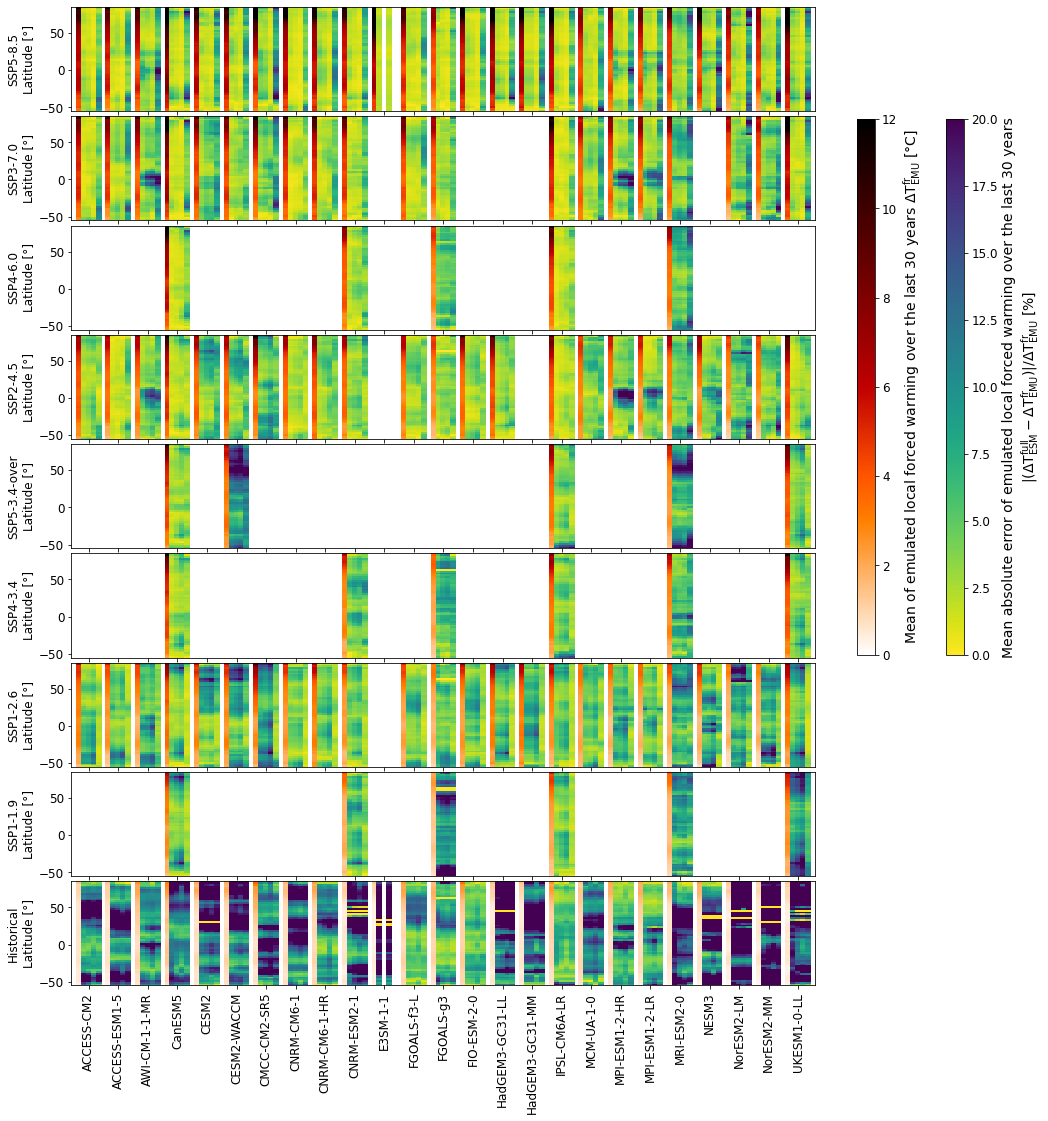

<IPython.core.display.Javascript object>

In [17]:
print('Plot forced warming (error) statistics, i.e., Figure S6')

plt.figure(figsize=(16, 2*len(scenarios)))
plt.rcParams.update({'mathtext.default':'regular'}) 
fs = 12
plt.rcParams.update({'font.size':fs})

grid = plt.GridSpec(len(scenarios), len(esms)+5, wspace=0., hspace=0.05) # create a grid for the subplots


for i,scen in enumerate(scenarios):
    ax1 = plt.subplot(grid[i,:len(esms)])

    mesh_m_lt=plt.pcolormesh(np.arange(151),lat['e'],m_lt_arr[scen],cmap='gist_heat_r',vmin=0,vmax=12)
    mesh_mabe_lt=plt.pcolormesh(np.arange(151),lat['e'],mabe_lt_p_arr[scen],cmap='viridis_r',vmin=0,vmax=20)
    plt.ylim([lat['e'][14],lat['e'][70]])
    plt.xticks(np.arange(2.5,151,6));
    plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
    plt.xlim([-1,150])

    plt.ylabel(scen_names[scen]+'\nLatitude [°]')

plt.xticks(np.arange(2.5,151,6),esms,rotation=90);

ax1 = plt.subplot(grid[:-2,-5:-3])
plt.axis('off')
cbar=plt.colorbar(mesh_m_lt,fraction=0.3,aspect=30)
cbar.set_label('Mean of emulated local forced warming over the last '+str(idx_start)+' years $\Delta T^{fr}_{EMU}$ [°C]',fontsize=fs+2)

ax1 = plt.subplot(grid[:-2,-2:])
plt.axis('off')
cbar=plt.colorbar(mesh_mabe_lt,fraction=0.3,aspect=30)
cbar.set_label('Mean absolute error of emulated local forced warming over the last '+str(idx_start)+' years\n$|(\Delta T^{full}_{ESM} - \Delta T^{fr}_{EMU})| / \Delta T^{fr}_{EMU}$ [%]',fontsize=fs+2)


#plt.savefig(cfg.dir_plots+'si/lt_mesmer_eval_default_vs_lessscen_allesms_allscens.png' ,dpi=200 ,bbox_inches='tight')
#plt.savefig(cfg.dir_plots+'si/lt_mesmer_eval_default_vs_lessscen_allesms_allscens.pdf' ,dpi=200 ,bbox_inches='tight')


In [18]:
print('ADDITIONAL PREDICTORS CONFIGURATION')
print('Retrain MESMER with various combination of available scenarios (until the local forced warming module)')

emus_lt={}
params_lt={}
for esm in esms:
    print(esm)
    params_lt[esm]={}
    emus_lt[esm]={}
    
    print(esm, "Start with global trend module")
    params_gt_T = train_gt(GSAT[esm], targ, esm, time[esm], cfg, save_params=False)
    params_gt_hfds = train_gt(GHFDS[esm], "hfds", esm, time[esm], cfg, save_params=True)

    preds_gt = {"time": time[esm]}
    emus_gt_T = create_emus_gt(
        params_gt_T, preds_gt, cfg, concat_h_f=True, save_emus=False
    )
    gt_T_s = create_emus_gt(
        params_gt_T, preds_gt, cfg, concat_h_f=False, save_emus=False
    )

    print(
        esm,
        "Start preparing predictors for local trends",
    )
    
    gt_T2_s = {}
    for scen in gt_T_s.keys():
        gt_T2_s[scen] = gt_T_s[scen] ** 2

    gt_hfds_s = create_emus_gt(
        params_gt_hfds, preds_gt, cfg, concat_h_f=False, save_emus=False
    )
    
    gv_novolc_T = {}
    for scen in emus_gt_T.keys():
        gv_novolc_T[scen] = GSAT[esm][scen] - emus_gt_T[scen]
    gv_novolc_T_s, time_s = separate_hist_future(gv_novolc_T, time[esm], cfg)


    print(esm, "Start with local trends module")
    preds = {
        "gttas": gt_T_s,
        "gttas2": gt_T2_s,
        "gthfds": gt_hfds_s,
        "gvtas": gv_novolc_T_s,
    }
    targs = {"tas": tas_s[esm]}
    params_lt[esm]['all'], params_lv = train_lt(preds, targs, esm, cfg, save_params=False)

    preds_lt = {"gttas": gt_T_s, "gttas2": gt_T2_s, "gthfds": gt_hfds_s}
    emus_lt[esm]['all'] = create_emus_lt(params_lt[esm]['all'], preds_lt, cfg, concat_h_f=False, save_emus=False)
    
        
    if 'ssp126' in gt_T_s.keys():
        subset='h-585-126'
        preds = {
            "gttas":  {k: gt_T_s[k] for k in ('hist', 'ssp585', 'ssp126')},
            "gttas2":  {k: gt_T2_s[k] for k in ('hist', 'ssp585', 'ssp126')},
            "gthfds":  {k: gt_hfds_s[k] for k in ('hist', 'ssp585', 'ssp126')},
            "gvtas":  {k: gv_novolc_T_s[k] for k in ('hist', 'ssp585', 'ssp126')},
        } 

        targs = {"tas": {k: tas_s[esm][k] for k in ('hist', 'ssp585', 'ssp126')}}  # targets list
        params_lt[esm][subset], params_lv = train_lt(preds, targs, esm, cfg, save_params=False)

        preds_lt = {"gttas": gt_T_s, "gttas2": gt_T2_s, "gthfds": gt_hfds_s}
        emus_lt[esm][subset] = create_emus_lt(params_lt[esm][subset], preds_lt, cfg, concat_h_f=False, save_emus=False)

    subset='h-585'
    preds = {
        "gttas":  {k: gt_T_s[k] for k in ('hist', 'ssp585')},
        "gttas2":  {k: gt_T2_s[k] for k in ('hist', 'ssp585')},
        "gthfds":  {k: gt_hfds_s[k] for k in ('hist', 'ssp585')},
        "gvtas":  {k: gv_novolc_T_s[k] for k in ('hist', 'ssp585')},
    } 

    targs = {"tas": {k: tas_s[esm][k] for k in ('hist', 'ssp585')}}  # targets list
    params_lt[esm][subset], params_lv = train_lt(preds, targs, esm, cfg, save_params=False)

    preds_lt = {"gttas": gt_T_s, "gttas2": gt_T2_s, "gthfds": gt_hfds_s}
    emus_lt[esm][subset] = create_emus_lt(params_lt[esm][subset], preds_lt, cfg, concat_h_f=False, save_emus=False)

    if 'ssp126' in gt_T_s.keys():
        subset='h-126'
        preds = {
            "gttas":  {k: gt_T_s[k] for k in ('hist', 'ssp126')},
            "gttas2":  {k: gt_T2_s[k] for k in ('hist', 'ssp126')},
            "gthfds":  {k: gt_hfds_s[k] for k in ('hist', 'ssp126')},
            "gvtas":  {k: gv_novolc_T_s[k] for k in ('hist', 'ssp126')},
        } 

        targs = {"tas": {k: tas_s[esm][k] for k in ('hist','ssp126')}}  # targets list
        params_lt[esm][subset], params_lv = train_lt(preds, targs, esm, cfg, save_params=False)

        preds_lt = {"gttas": gt_T_s, "gttas2": gt_T2_s, "gthfds": gt_hfds_s}
        emus_lt[esm][subset] = create_emus_lt(params_lt[esm][subset], preds_lt, cfg, concat_h_f=False, save_emus=False)


ADDITIONAL PREDICTORS CONFIGURATION
Retrain MESMER with various combination of available scenarios (until the local forced warming module)
ACCESS-CM2
ACCESS-CM2 Start with global trend module
ACCESS-CM2 Start preparing predictors for local trends
ACCESS-CM2 Start with local trends module
ACCESS-ESM1-5
ACCESS-ESM1-5 Start with global trend module
ACCESS-ESM1-5 Start preparing predictors for local trends
ACCESS-ESM1-5 Start with local trends module
AWI-CM-1-1-MR
AWI-CM-1-1-MR Start with global trend module
AWI-CM-1-1-MR Start preparing predictors for local trends
AWI-CM-1-1-MR Start with local trends module
CanESM5
CanESM5 Start with global trend module
CanESM5 Start preparing predictors for local trends
CanESM5 Start with local trends module
CESM2
CESM2 Start with global trend module
CESM2 Start preparing predictors for local trends
CESM2 Start with local trends module
CESM2-WACCM
CESM2-WACCM Start with global trend module
CESM2-WACCM Start preparing predictors for local trends
CESM2-WA

<IPython.core.display.Javascript object>

In [19]:
print("Compute forced warming (error) statistics and fill into array for plotting")

# how many years back from end of scenario at hand the evaluation reaches
idx_start = 30  # same as for emus_lt before


nr_lats = len(lat["c"])
nr_cols = (5 + 1) * len(esms)

subsets = ["all", "h-585-126", "h-585", "h-126"]

m_lt_arr = {}
mabe_lt_p_arr = {}
for scen in scenarios:
    m_lt_arr[scen] = np.ma.zeros([nr_lats, nr_cols])
    m_lt_arr[scen].mask = True  # mask the full array
    mabe_lt_p_arr[scen] = np.ma.zeros([nr_lats, nr_cols])
    mabe_lt_p_arr[scen].mask = True  # mask the full array

    for i, esm in enumerate(esms):
        if scen in tas_s[esm].keys():
            m_lt = np.mean(emus_lt[esm]["all"][scen]["tas"][-idx_start:, :], axis=0)
            m_lt_g = copy.deepcopy(ls["grid_l_m"])
            m_lt_g[ls["idx_grid_l"]] = m_lt
            m_lt_arr[scen][:, i * 6] = np.mean(m_lt_g, axis=1)

            for j, subset in enumerate(subsets):

                if subset in emus_lt[esm].keys():
                    mabe_lt_p = (
                        np.abs(
                            np.mean(
                                (tas_s[esm][scen] - emus_lt[esm][subset][scen]["tas"])[
                                    :, -idx_start:, :
                                ],
                                axis=(0, 1),
                            )
                        )
                        / m_lt
                        * 100
                    )
                    # mean absolute error lt in percentage of mean lt
                else:
                    mabe_lt_p = np.zeros(ls["idx_grid_l"].sum())
                    mabe_lt_p[:] = np.nan
                mabe_lt_p_g = copy.deepcopy(ls["grid_l_m"])
                mabe_lt_p_g[ls["idx_grid_l"]] = mabe_lt_p
                mabe_lt_p_arr[scen][:, i * 6 + j + 1] = np.mean(mabe_lt_p_g, axis=1)

Compute forced warming (error) statistics and fill into array for plotting


<IPython.core.display.Javascript object>

Plot forced warming (error) statistics, i.e., Figure S7


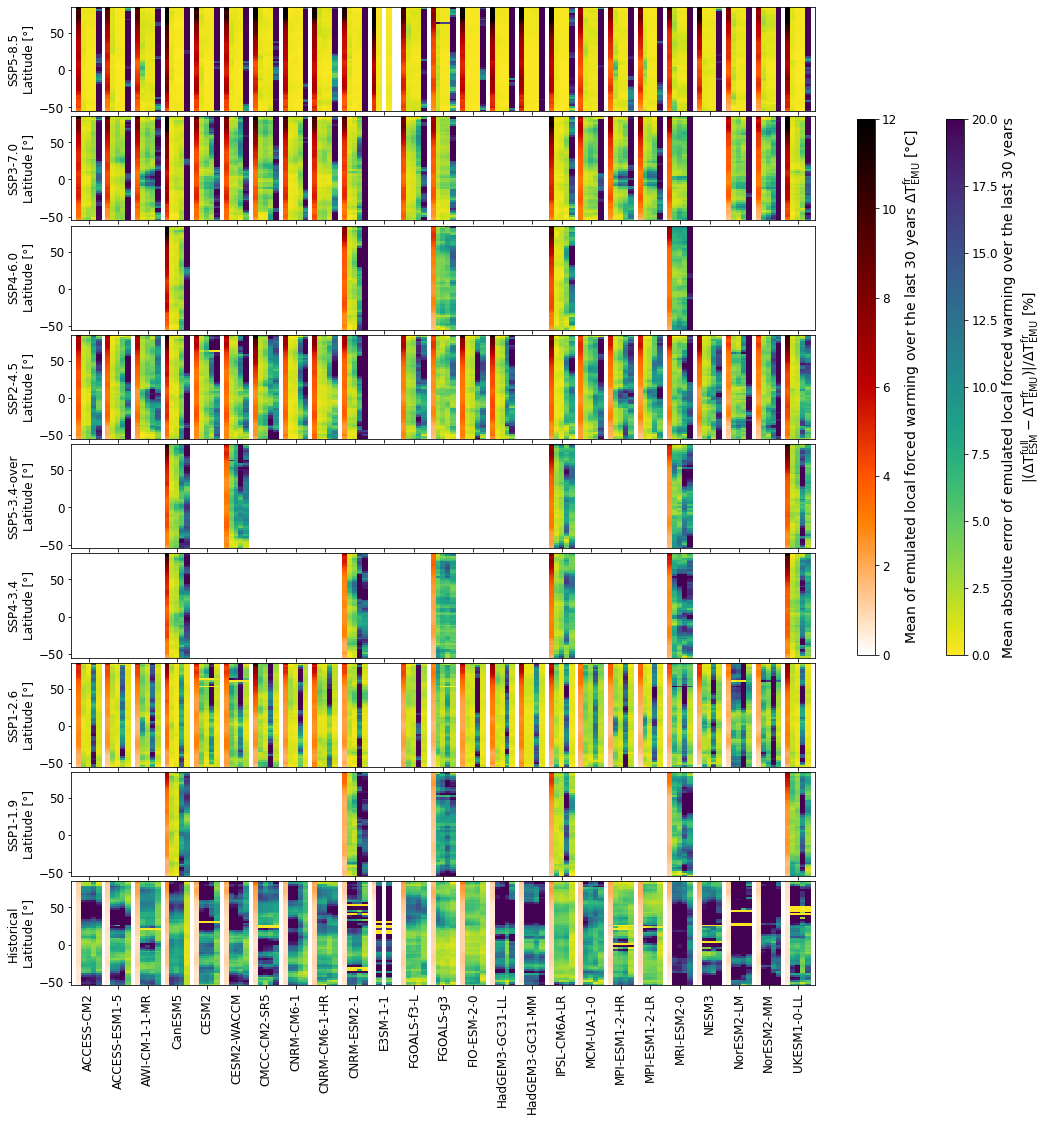

<IPython.core.display.Javascript object>

In [20]:
print("Plot forced warming (error) statistics, i.e., Figure S7")


plt.figure(figsize=(16, 2 * len(scenarios)))
plt.rcParams.update({"mathtext.default": "regular"})
fs = 12
plt.rcParams.update({"font.size": fs})

grid = plt.GridSpec(
    len(scenarios), len(esms) + 5, wspace=0.0, hspace=0.05
)  # create a grid for the subplots


for i, scen in enumerate(scenarios):
    ax1 = plt.subplot(grid[i, : len(esms)])

    mesh_m_lt = plt.pcolormesh(
        np.arange(151), lat["e"], m_lt_arr[scen], cmap="gist_heat_r", vmin=0, vmax=12
    )
    mesh_mabe_lt = plt.pcolormesh(
        np.arange(151), lat["e"], mabe_lt_p_arr[scen], cmap="viridis_r", vmin=0, vmax=20
    )
    plt.ylim([lat["e"][14], lat["e"][70]])
    plt.xticks(np.arange(2.5, 151, 6))
    plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
    plt.xlim([-1, 150])

    plt.ylabel(scen_names[scen] + "\nLatitude [°]")

plt.xticks(np.arange(2.5, 151, 6), esms, rotation=90)

ax1 = plt.subplot(grid[:-2, -5:-3])
plt.axis("off")
cbar = plt.colorbar(mesh_m_lt, fraction=0.3, aspect=30)
cbar.set_label(
    "Mean of emulated local forced warming over the last "
    + str(idx_start)
    + " years $\Delta T^{fr}_{EMU}$ [°C]",
    fontsize=fs + 2,
)

ax1 = plt.subplot(grid[:-2, -2:])
plt.axis("off")
cbar = plt.colorbar(mesh_mabe_lt, fraction=0.3, aspect=30)
cbar.set_label(
    "Mean absolute error of emulated local forced warming over the last "
    + str(idx_start)
    + " years\n$|(\Delta T^{full}_{ESM} - \Delta T^{fr}_{EMU})| / \Delta T^{fr}_{EMU}$ [%]",
    fontsize=fs + 2,
)


# plt.savefig(cfg.dir_plots+'si/lt_mesmer_eval_addpreds_vs_lessscen_allesms_allscens.png' ,dpi=200 ,bbox_inches='tight')
# plt.savefig(cfg.dir_plots+'si/lt_mesmer_eval_addpreds_vs_lessscen_allesms_allscens.pdf' ,dpi=200 ,bbox_inches='tight')